In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [3]:
df_train = pd.read_csv('shuffled-full-set-hashed.csv',header = None)
df_train.head()
df_train.columns=['Documents','Data']

In [4]:
df_train.describe()
df_train.head()

,Documents,Data
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


In [5]:
df_train.dtypes

Documents    object
Data         object
dtype: object

In [6]:
df_train.shape

(62204, 2)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62204 entries, 0 to 62203
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Documents  62204 non-null  object
 1   Data       62159 non-null  object
dtypes: object(2)
memory usage: 972.1+ KB


In [8]:
df_train.isnull()

,Documents,Data
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
62199,False,False
62200,False,False
62201,False,False
62202,False,False


In [9]:
df_train.isnull().values.any()

True

In [10]:
df_train = df_train.dropna()
null_test = df_train[df_train.columns[0:2]]
final_test = null_test.isnull().sum()

In [11]:
final_test

Documents    0
Data         0
dtype: int64

In [12]:
df_train = df_train.drop_duplicates()
sum(df_train.duplicated())

0

In [13]:
df_train.describe()

,Documents,Data
count,60542,60542
unique,14,60176
top,BILL,84884d80641d
freq,18449,3


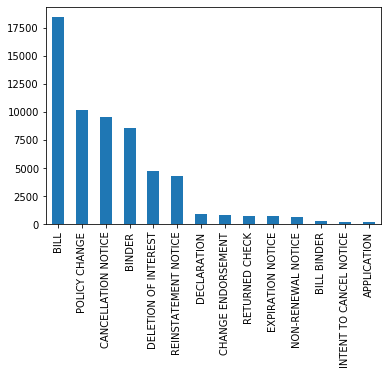

In [14]:
pd.value_counts(df_train['Documents']).plot.bar()

In [15]:
df_train['Documents'].value_counts()

BILL                       18449
POLICY CHANGE              10229
CANCELLATION NOTICE         9571
BINDER                      8590
DELETION OF INTEREST        4779
REINSTATEMENT NOTICE        4295
DECLARATION                  966
CHANGE ENDORSEMENT           866
RETURNED CHECK               730
EXPIRATION NOTICE            719
NON-RENEWAL NOTICE           618
BILL BINDER                  277
INTENT TO CANCEL NOTICE      227
APPLICATION                  226
Name: Documents, dtype: int64

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Documents'] = le.fit_transform(df_train['Documents'])

In [17]:
X = df_train['Data']
y = df_train['Documents']

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [19]:
vectorizer = TfidfVectorizer(min_df =0.1, lowercase = False, smooth_idf=False)
x_train = vectorizer.fit_transform(X_train)

In [20]:
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [21]:
transformer = TfidfTransformer()
tfidf_train_vectors = transformer.fit_transform(tfidf_train)
tfidf_test_vectors = transformer.fit_transform(tfidf_test)

In [22]:
dtree = tree.DecisionTreeClassifier()
dtree_fit = dtree.fit(tfidf_train_vectors, y_train)

In [23]:
dtree_pred_test = dtree_fit.predict(tfidf_test_vectors)
print("Accuracy:",metrics.accuracy_score(y_test,dtree_pred_test))

Accuracy: 0.7796680155256421


In [24]:
lr = LogisticRegression(random_state=42, solver='lbfgs',multi_class='multinomial', C=14)
lr_fit = lr.fit(tfidf_train_vectors, y_train)

C:\Users\Dipesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
lr_pred_test = lr_fit.predict(tfidf_test_vectors)
print("Accuracy:",metrics.accuracy_score(y_test,lr_pred_test))

Accuracy: 0.8574613923527954


In [26]:
pd.crosstab(y_train,pd.Series(lr_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ACTUAL,,,,,,,,,,,,,,
0,1,12,0,9,5,0,0,2,0,0,0,6,1,1
1,11,924,4,470,505,36,16,224,28,9,21,447,179,20
2,0,17,0,8,8,0,0,4,1,0,0,7,3,2
3,4,439,1,196,236,14,7,95,13,2,7,216,105,17
4,6,435,1,238,238,21,9,109,16,3,10,259,107,13
5,0,42,0,24,27,2,0,15,1,1,0,20,6,0
6,0,54,0,24,23,0,0,11,2,0,1,20,14,2
7,1,214,1,120,134,11,2,68,5,2,4,119,60,6
8,1,36,0,26,13,5,1,12,1,0,0,13,8,2


In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_test))  

Mean Absolute Error: 0.7482038153439591


In [ ]:
from sklearn.svm import SVC
svm = sklearn.svm.SVC()
svm_fit = svm.fit(tfidf_train_vectors, y_train)

In [ ]:
svm_pred_test = svm_fit.predict(tfidf_test_vectors)
print("Accuracy:",metrics.accuracy_score(y_test,svm_pred_test))

In [28]:
rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(tfidf_train_vectors, y_train)

In [29]:
rf_pred_test = rf_fit.predict(tfidf_test_vectors)
print("Accuracy:",metrics.accuracy_score(y_test,rf_pred_test))

Accuracy: 0.848955322487406


In [30]:
pd.crosstab(y_train,pd.Series(rf_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ACTUAL,,,,,,,,,,,,,,
0,1,10,0,8,5,0,0,2,0,0,0,9,1,1
1,8,897,4,466,493,34,7,227,26,4,17,517,174,20
2,0,14,0,9,10,0,0,4,1,0,0,7,3,2
3,3,425,1,199,229,14,6,94,11,1,7,250,96,16
4,5,422,1,232,244,17,6,109,19,3,6,288,103,10
5,0,40,0,24,28,2,0,15,1,0,0,22,6,0
6,0,53,0,22,20,0,1,11,2,0,1,25,14,2
7,1,212,2,112,128,11,1,65,6,1,4,142,56,6
8,0,35,0,24,16,4,0,11,1,0,0,18,7,2


In [31]:
knn = KNeighborsClassifier(n_neighbors=1).fit(tfidf_train_vectors, y_train)

In [32]:
knn_pred_test = knn.predict(tfidf_test_vectors)
print("Accuracy:",metrics.accuracy_score(y_test,knn_pred_test))

Accuracy: 0.6358906598397885


In [33]:
pd.crosstab(y_train,pd.Series(knn_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ACTUAL,,,,,,,,,,,,,,
0,1,11,2,7,5,0,1,2,0,0,0,6,1,1
1,12,884,10,335,468,36,49,230,41,15,30,537,223,24
2,0,15,1,4,6,1,0,3,2,1,0,10,6,1
3,5,420,3,150,223,21,19,98,19,6,9,238,124,17
4,6,437,6,193,223,19,17,108,22,9,11,274,130,10
5,1,35,1,20,23,2,0,15,1,0,2,25,11,2
6,0,54,0,11,22,0,3,13,2,0,4,30,10,2
7,2,214,1,93,137,6,7,67,9,1,10,130,63,7
8,1,38,0,17,20,3,3,10,1,0,0,16,7,2


In [34]:
import pickle
output = open('machine_learning_lr.pkl', 'wb')
pickle.dump(vectorizer,output)
pickle.dump(transformer,output)
pickle.dump(lr_fit,output)
output.close()